is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

Treino:  0.9980871100647439
Teste:  0.9558333333333333

Relatório de Classificação (Treino):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6037
           1       1.00      0.98      0.99       759

    accuracy                           1.00      6796
   macro avg       1.00      0.99      1.00      6796
weighted avg       1.00      1.00      1.00      6796



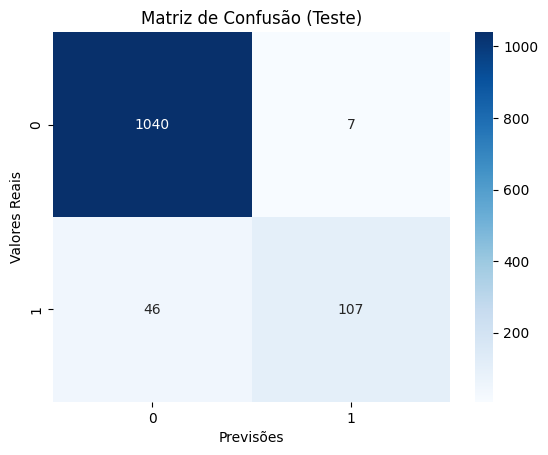

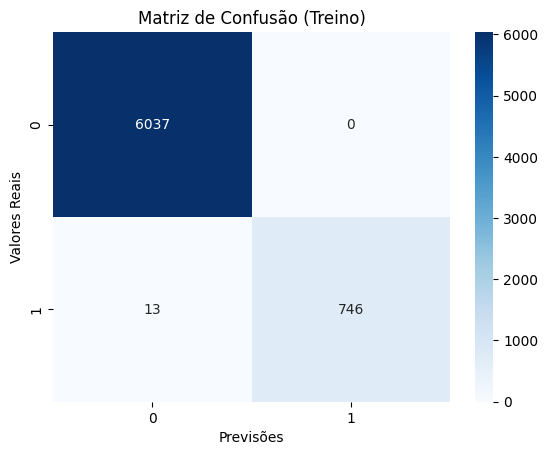

In [ ]:
import pandas as pd
import numpy as np

from joblib import dump

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('datashet.csv')

df.dropna(inplace=True)

Y = df['is_safe']

print(Y.value_counts())

X = df.drop('is_safe', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15,
random_state=42)

# print("Valores únicos em Y_train:", Y_train.unique())
# print("Valores únicos em Y_test:", Y_test.unique())

X_train = X_train.replace('#NUM!', np.nan).dropna()
Y_train = Y_train.replace('#NUM!', np.nan).dropna()

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


model = GridSearchCV(
    RandomForestClassifier(criterion='entropy', random_state=0),
    {
        'max_depth': [3, 5, None],  # Testa várias profundidades
        'min_samples_split': [2, 5, 10],  # Testa diferentes divisões mínimas
        'min_samples_leaf': [1, 2, 4],  # Testa diferentes tamanhos mínimos das folhas
    },
    n_jobs=4
)

model.fit(X_train, Y_train)

print(model.best_params_)
model = model.best_estimator_
dump(model, 'model.pkl')

print("\nTreino: ", accuracy_score(Y_train, model.predict(X_train)))
print("Teste: ", accuracy_score(Y_test, model.predict(X_test)))

# Relatório de classificação
print("\nRelatório de Classificação (Treino):")
print(classification_report(Y_train, model.predict(X_train)))


import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de Confusão
cm = confusion_matrix(Y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsões')c                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  0
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão (Teste)')
plt.show()

# Matriz de Confusão
cm = confusion_matrix(Y_train, model.predict(X_train))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão (Treino)')
plt.show()